In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import sklearn

In [ ]:
path = '/content/drive/My Drive/TDWarfarin_Dataset.xls'

sheet_name = 'Subject Data'
df = pd.read_excel(path, sheet_name=sheet_name)
print(df.head())  # Print the first few rows to verify

  PharmGKB Subject ID PharmGKB Sample ID  Project Site  Gender  \
0         PA135312261        PA135312629             1    male   
1         PA135312262        PA135312630             1  female   
2         PA135312263        PA135312631             1  female   
3         PA135312264        PA135312632             1    male   
4         PA135312265        PA135312633             1    male   

  Race (Reported) Race (OMB)    Ethnicity (Reported)         Ethnicity (OMB)  \
0           White      White  not Hispanic or Latino  not Hispanic or Latino   
1           White      White  not Hispanic or Latino  not Hispanic or Latino   
2           White      White  not Hispanic or Latino  not Hispanic or Latino   
3           White      White  not Hispanic or Latino  not Hispanic or Latino   
4           White      White  not Hispanic or Latino  not Hispanic or Latino   

       Age  Height (cm)  ...  \
0  60 - 69      193.040  ...   
1  50 - 59      176.530  ...   
2  40 - 49      162.560  .

In [ ]:
df = pd.read_excel(path,sheet_name='Subject Data')
df.head(5)

,PharmGKB Subject ID,PharmGKB Sample ID,Project Site,Gender,Race (Reported),Race (OMB),Ethnicity (Reported),Ethnicity (OMB),Age,Height (cm),...,VKORC1 QC genotype: -4451 C>A (861); Chr16:31018002; rs17880887; A/C,CYP2C9 consensus,VKORC1 -1639 consensus,VKORC1 497 consensus,VKORC1 1173 consensus,VKORC1 1542 consensus,VKORC1 3730 consensus,VKORC1 2255 consensus,VKORC1 -4451 consensus,Comments regarding Project Site Dataset
0,PA135312261,PA135312629,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,193.040,...,NaN,*1/*1,A/G,G/T,NaN,C/G,A/G,NaN,NaN,Project 1:
1,PA135312262,PA135312630,1,female,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,176.530,...,C/C,*1/*1,A/A,G/T,T/T,C/C,G/G,T/T,C/C,Warfarin Therapeutic Dose Definition:
2,PA135312263,PA135312631,1,female,White,White,not Hispanic or Latino,not Hispanic or Latino,40 - 49,162.560,...,NaN,*1/*1,G/G,T/T,NaN,G/G,A/G,NaN,NaN,The dose (unchanged for 6 days) that yielded a...
3,PA135312264,PA135312632,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,182.245,...,NaN,*1/*1,A/G,G/T,NaN,C/G,G/G,NaN,NaN,NaN
4,PA135312265,PA135312633,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,167.640,...,NaN,*1/*3,A/G,T/T,NaN,C/G,A/G,NaN,NaN,NaN


In [ ]:

selected_features = ['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)', 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)', 'Target INR', 'INR on Reported Therapeutic Dose of Warfarin', 'Cyp2C9 genotypes', 'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T', 'Therapeutic Dose of Warfarin']
df_selected = df[selected_features]
print(df_selected.head(5))
df_selected.shape

   Gender Race (Reported)      Age  Height (cm)  Weight (kg)  Diabetes  \
0    male           White  60 - 69      193.040        115.7       NaN   
1  female           White  50 - 59      176.530        144.2       NaN   
2  female           White  40 - 49      162.560         77.1       NaN   
3    male           White  60 - 69      182.245         90.7       NaN   
4    male           White  50 - 59      167.640         72.6       NaN   

   Simvastatin (Zocor)  Amiodarone (Cordarone)  Target INR  \
0                  0.0                     0.0         2.5   
1                  0.0                     0.0         2.5   
2                  0.0                     0.0         2.5   
3                  0.0                     0.0         2.5   
4                  0.0                     0.0         2.5   

   INR on Reported Therapeutic Dose of Warfarin Cyp2C9 genotypes  \
0                                          2.60            *1/*1   
1                                          2.1

(5700, 13)

In [ ]:
print(df_selected.describe())

       Height (cm)  Weight (kg)     Diabetes  Simvastatin (Zocor)  \
count  4554.000000  5413.000000  3283.000000          3861.000000   
mean    168.047778    77.852569     0.187024             0.146335   
std      10.845992    21.859764     0.389990             0.353488   
min     124.968000    30.000000     0.000000             0.000000   
25%     160.020000    62.000000     0.000000             0.000000   
50%     167.894000    75.000000     0.000000             0.000000   
75%     176.022000    90.000000     0.000000             0.000000   
max     202.000000   237.700000     1.000000             1.000000   

       Amiodarone (Cordarone)   Target INR  \
count             4182.000000  1259.000000   
mean                 0.066236     2.538324   
std                  0.248724     0.198140   
min                  0.000000     1.300000   
25%                  0.000000     2.500000   
50%                  0.000000     2.500000   
75%                  0.000000     2.500000   
max       

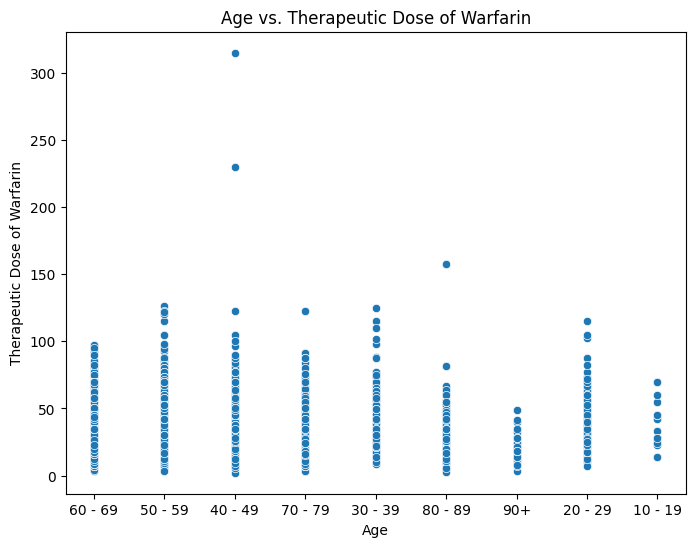

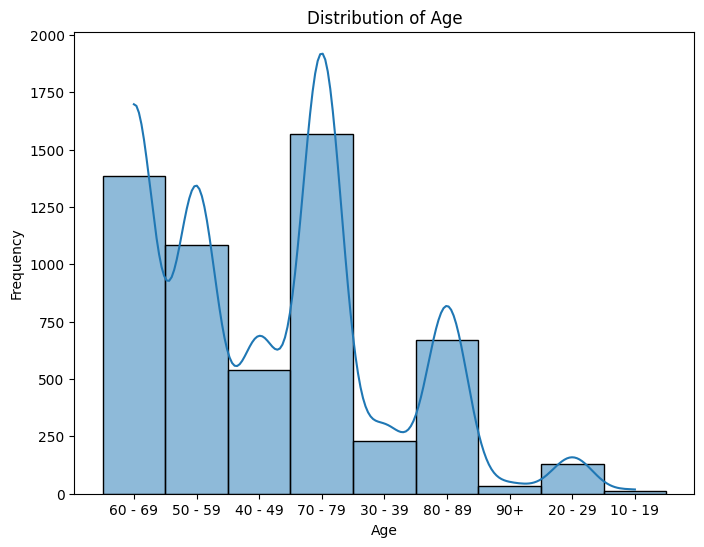

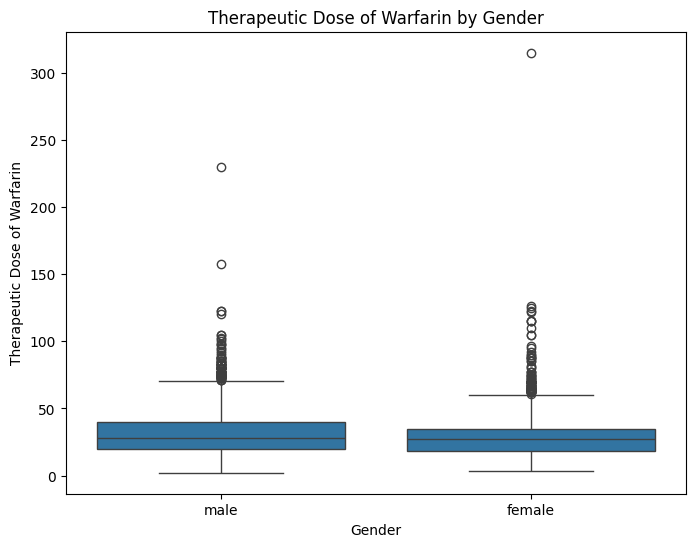

In [ ]:
# prompt: import matplotlib as plt
# import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns


# Example: Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Therapeutic Dose of Warfarin', data=df_selected)
plt.title('Age vs. Therapeutic Dose of Warfarin')
plt.xlabel('Age')
plt.ylabel('Therapeutic Dose of Warfarin')
plt.show()

# Example: Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_selected['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Example: Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Therapeutic Dose of Warfarin', data=df_selected)
plt.title('Therapeutic Dose of Warfarin by Gender')
plt.xlabel('Gender')
plt.ylabel('Therapeutic Dose of Warfarin')
plt.show()



Missing Value Counts:
 Gender                                                                  4
Race (Reported)                                                       506
Age                                                                    42
Height (cm)                                                          1146
Weight (kg)                                                           287
Diabetes                                                             2417
Simvastatin (Zocor)                                                  1839
Amiodarone (Cordarone)                                               1518
Target INR                                                           4441
INR on Reported Therapeutic Dose of Warfarin                          732
Cyp2C9 genotypes                                                      133
VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T    1654
Therapeutic Dose of Warfarin                                          172
dtype: int64


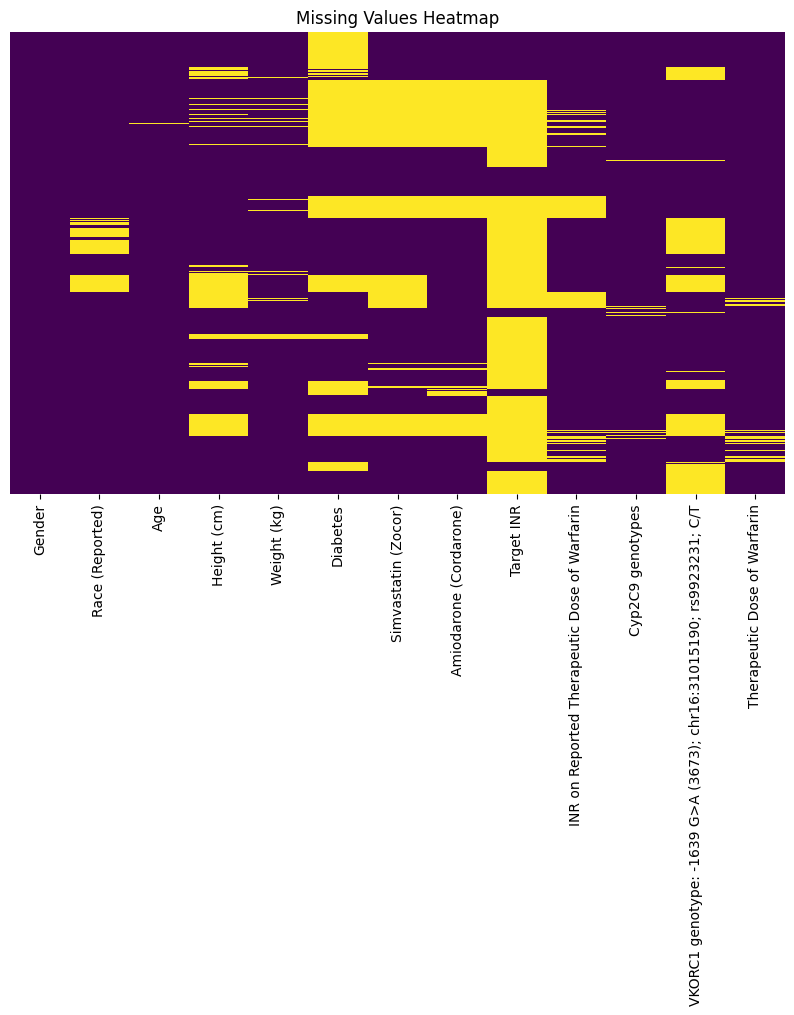


Missing Value Percentage:
 Gender                                                                0.070175
Race (Reported)                                                       8.877193
Age                                                                   0.736842
Height (cm)                                                          20.105263
Weight (kg)                                                           5.035088
Diabetes                                                             42.403509
Simvastatin (Zocor)                                                  32.263158
Amiodarone (Cordarone)                                               26.631579
Target INR                                                           77.912281
INR on Reported Therapeutic Dose of Warfarin                         12.842105
Cyp2C9 genotypes                                                      2.333333
VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T    29.017544
Therapeutic Dose of Warf

In [ ]:
# Missing value counts
missing_counts = df_selected.isnull().sum()
print("\nMissing Value Counts:\n", missing_counts)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_selected.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Missing value percentage
missing_percentage = (df_selected.isnull().sum() / len(df_selected)) * 100
print("\nMissing Value Percentage:\n", missing_percentage)


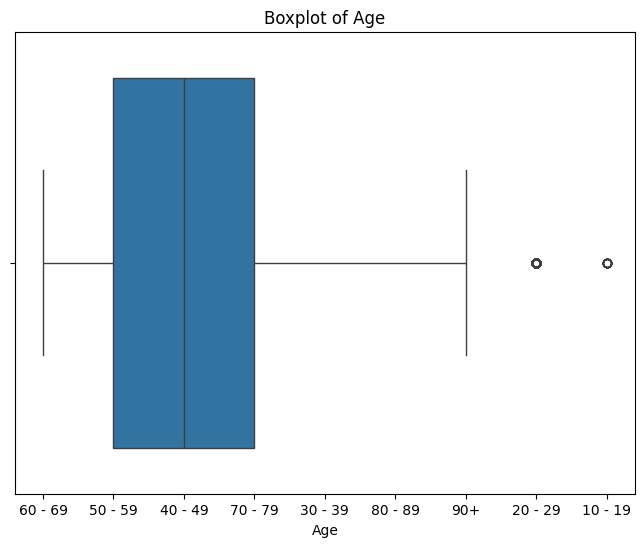

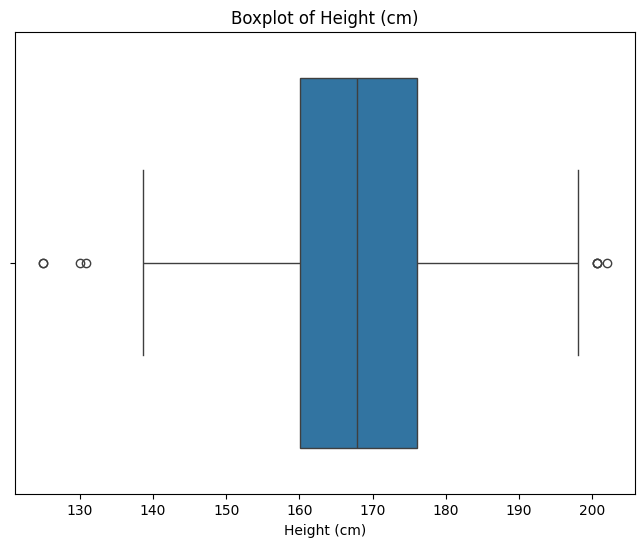

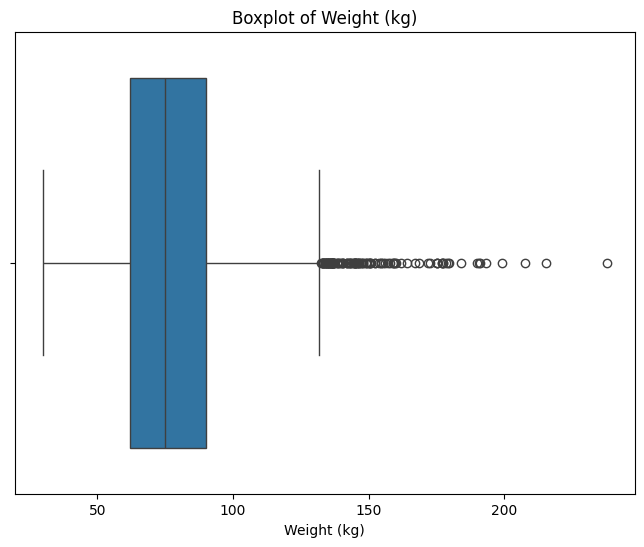

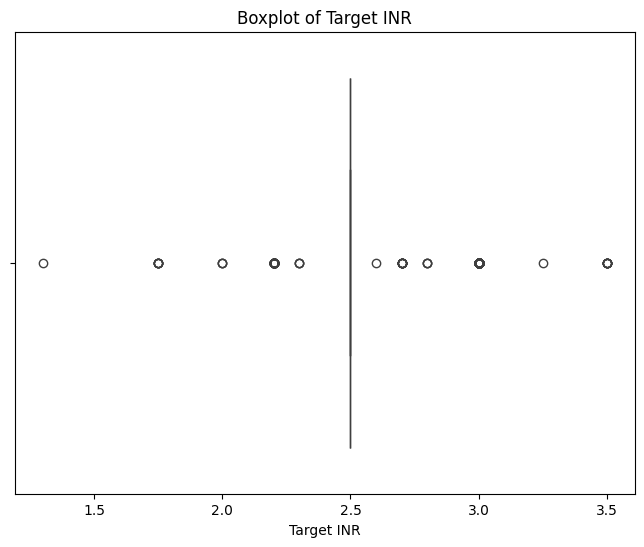

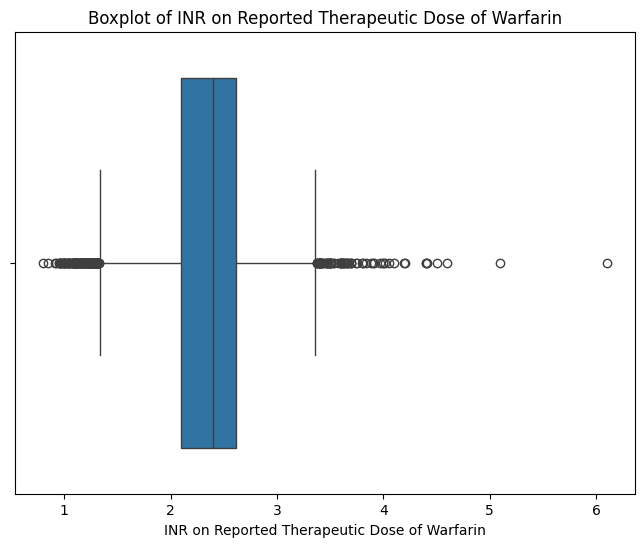

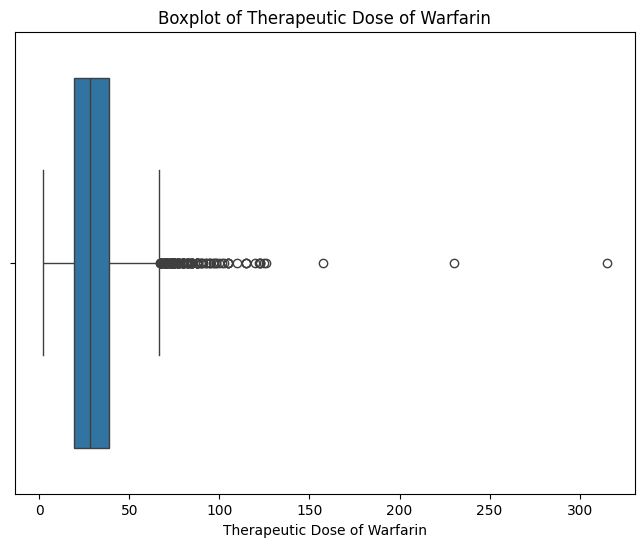

In [ ]:

# Box plots for numerical features
numerical_features = ['Age', 'Height (cm)', 'Weight (kg)', 'Target INR', 'INR on Reported Therapeutic Dose of Warfarin', 'Therapeutic Dose of Warfarin']
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_selected[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

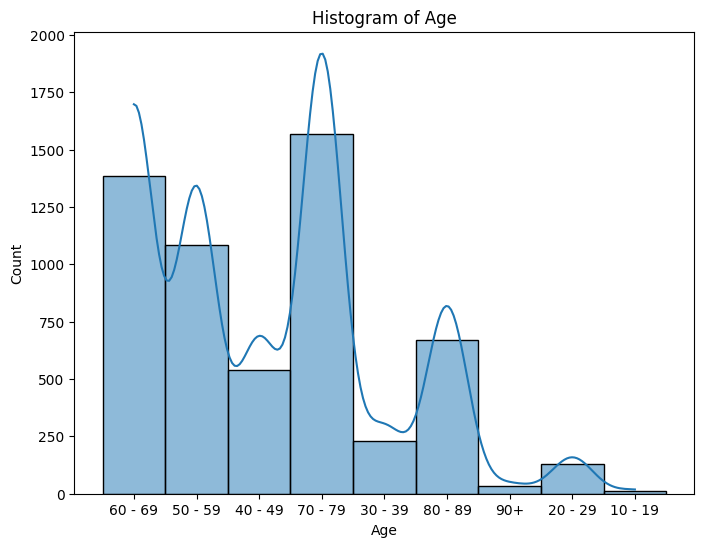

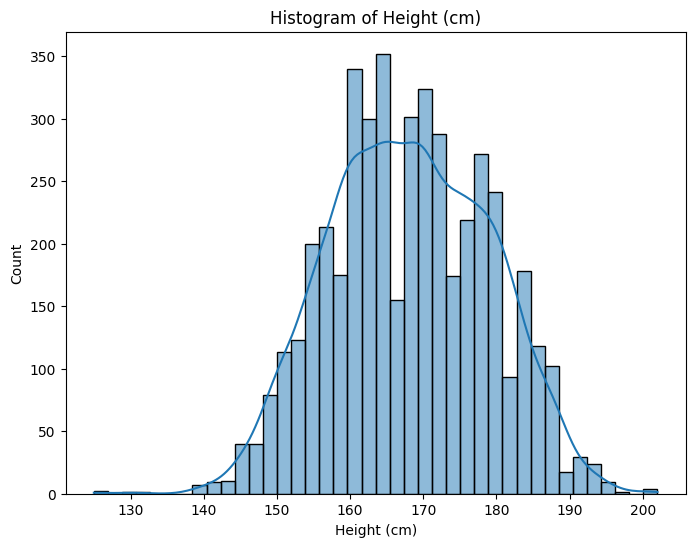

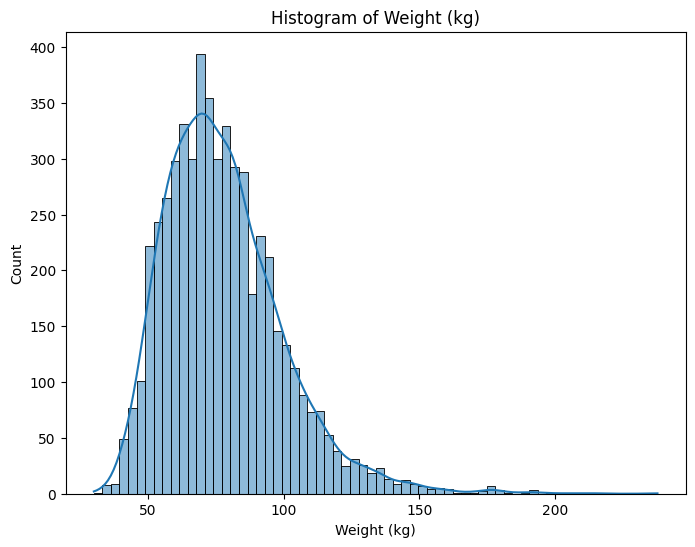

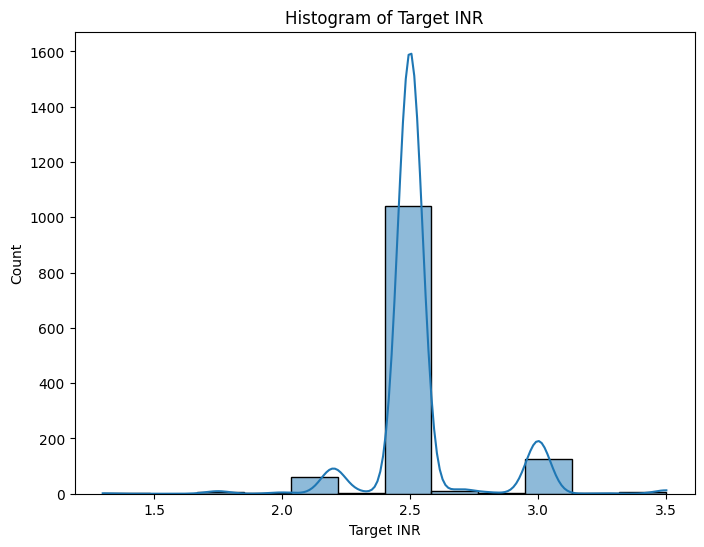

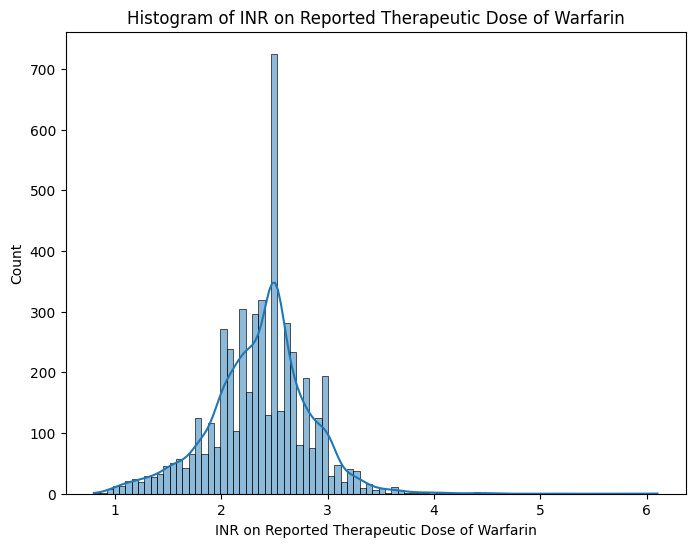

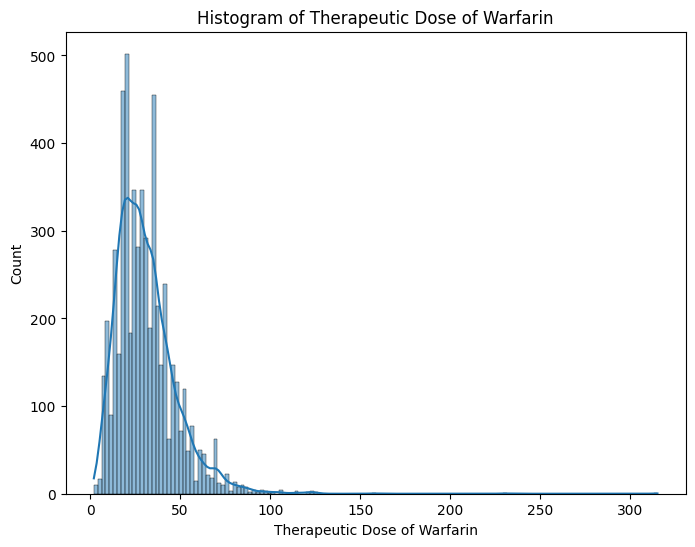

In [ ]:
# Histograms for numerical features
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_selected[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

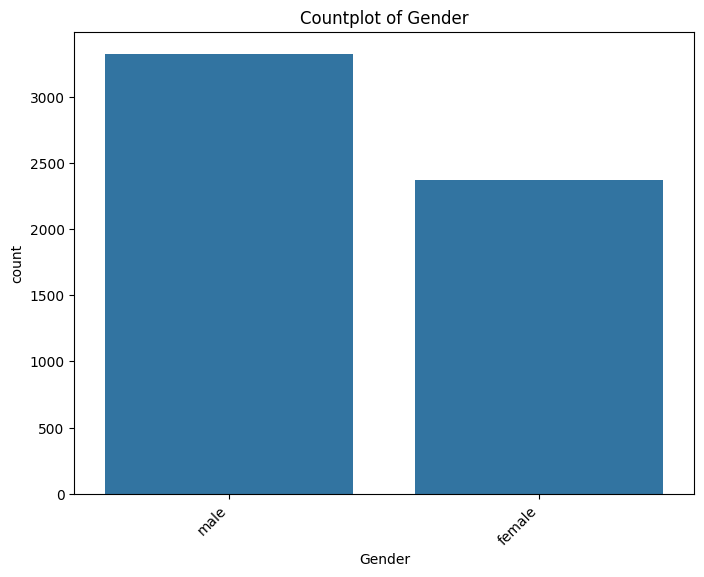

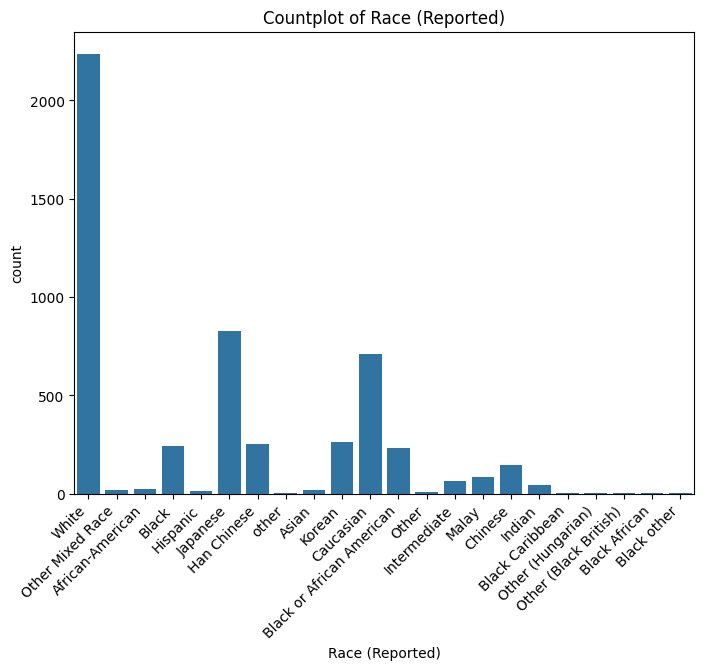

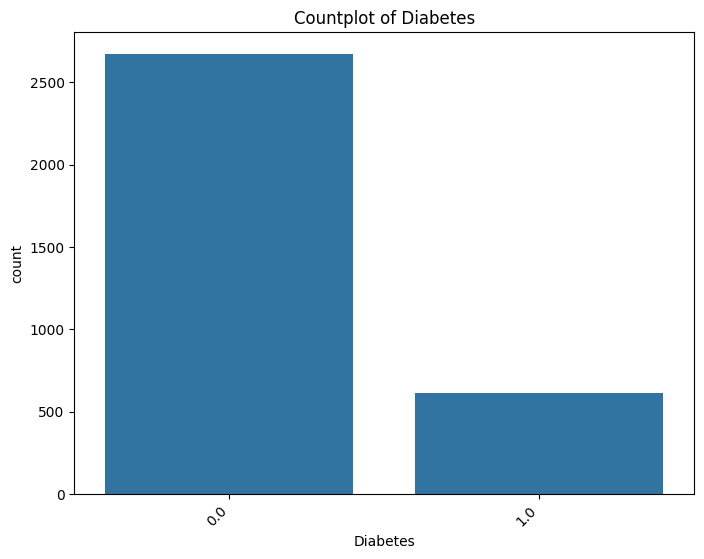

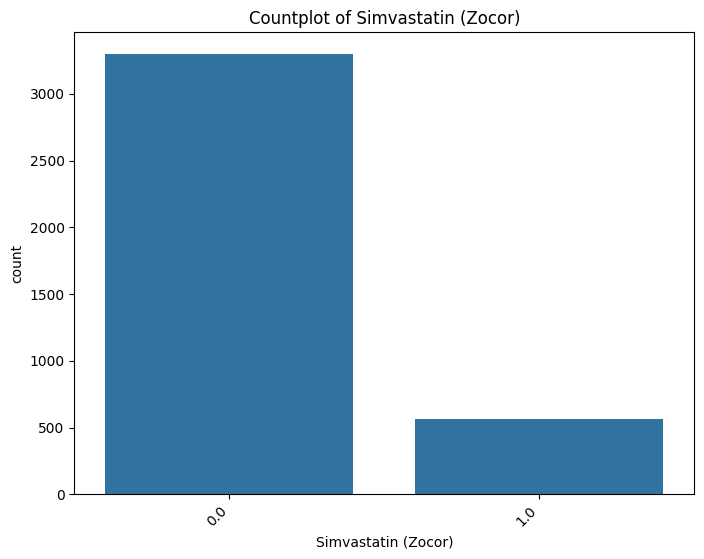

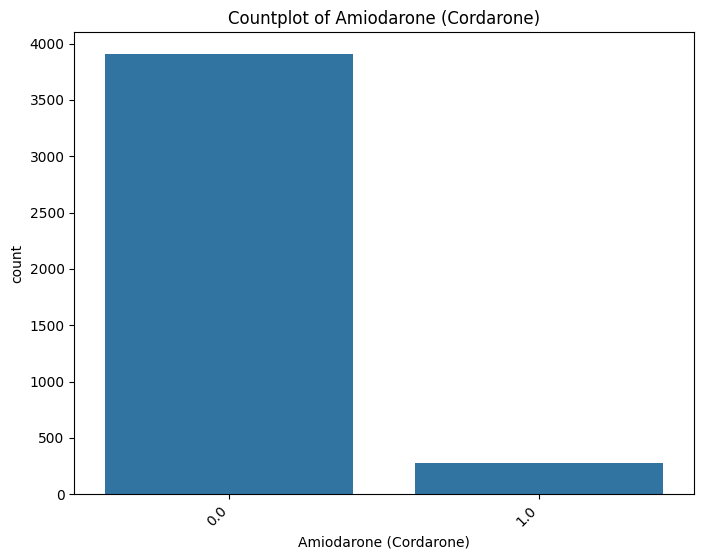

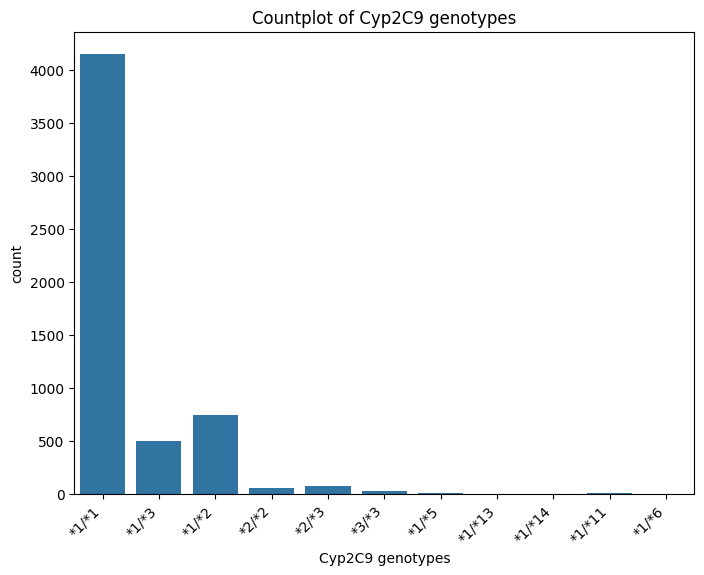

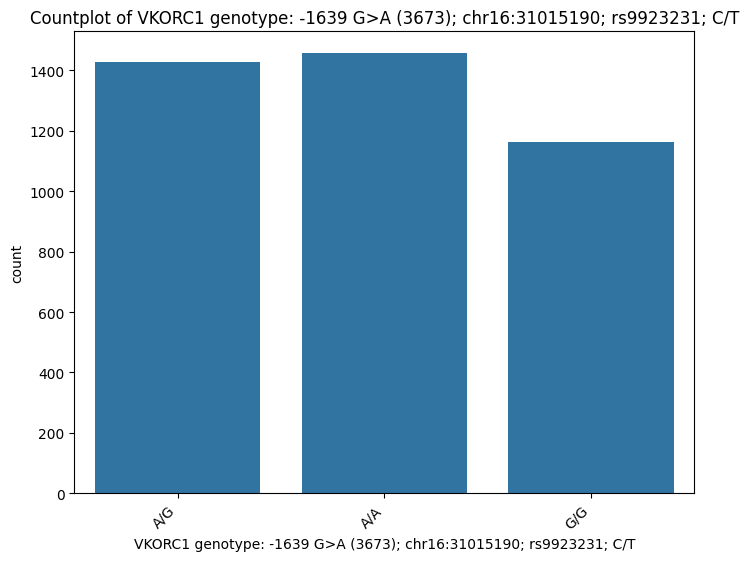

In [ ]:
# Count plots for categorical features
categorical_features = ['Gender', 'Race (Reported)', 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)', 'Cyp2C9 genotypes', 'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T']
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df_selected[col])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.show()


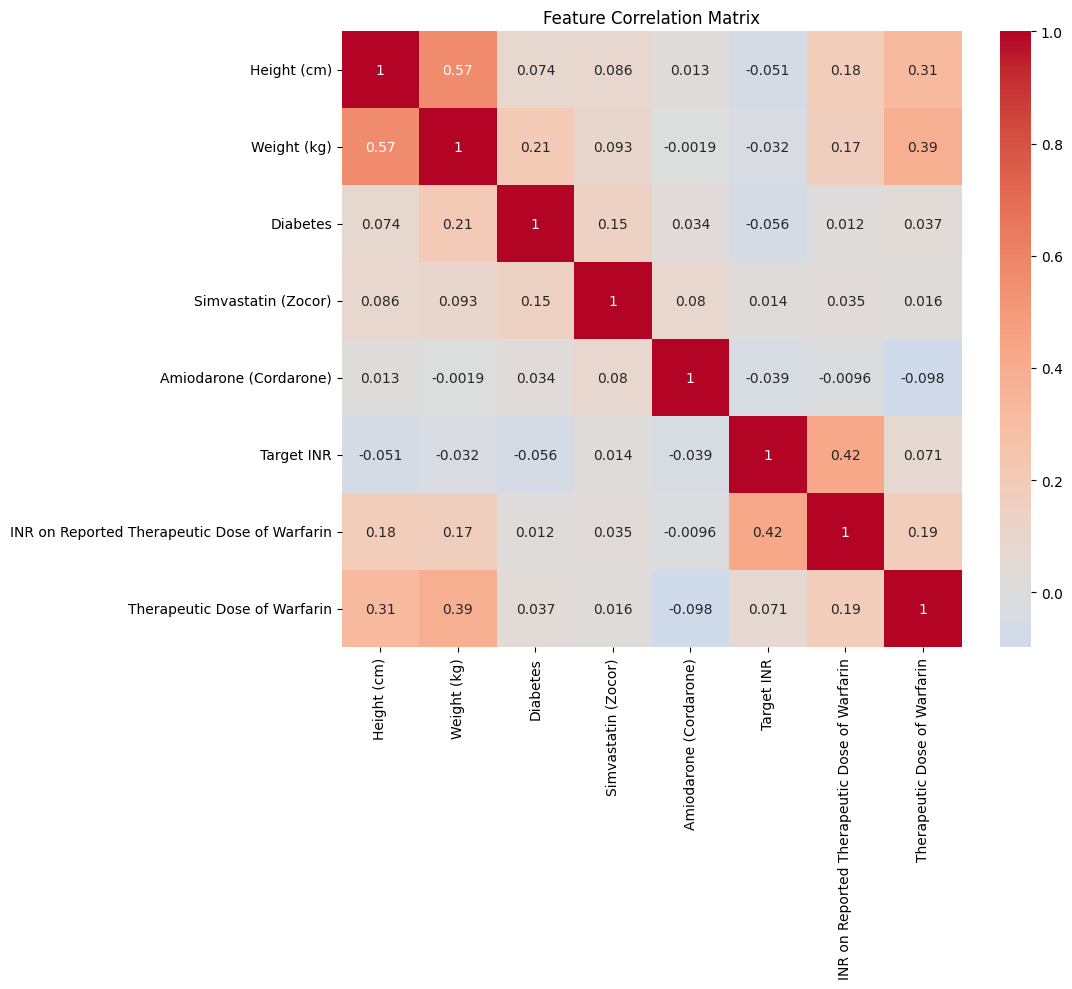

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only select numeric features
numeric_df = df_selected.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()

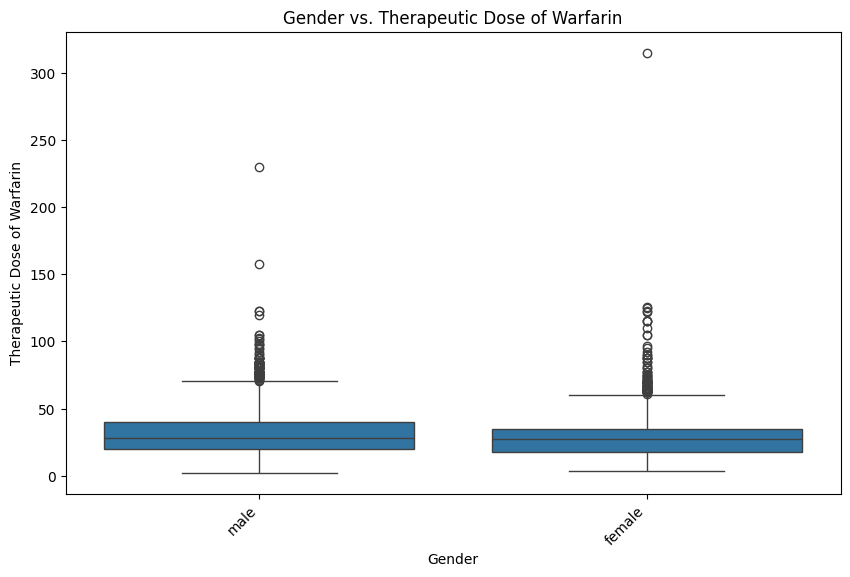

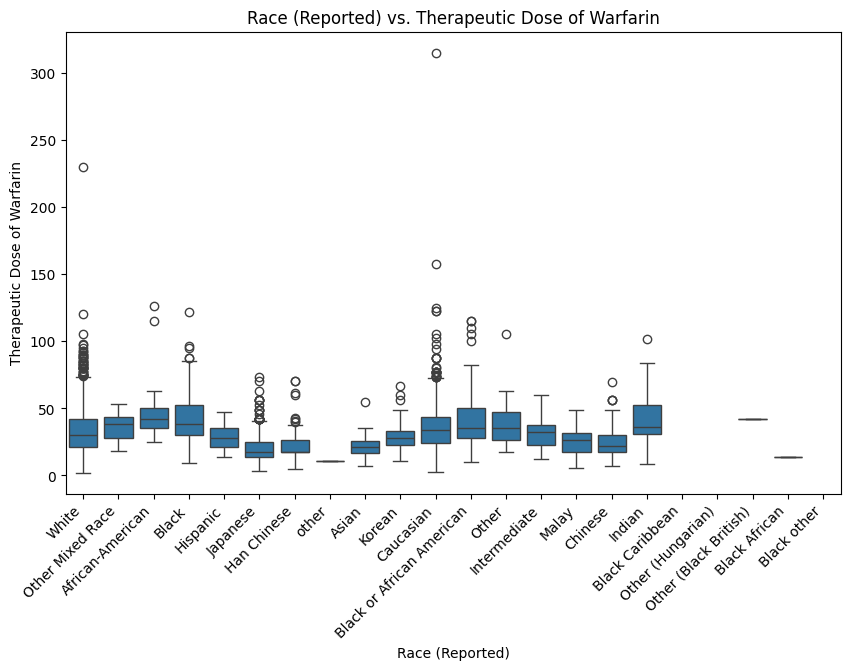

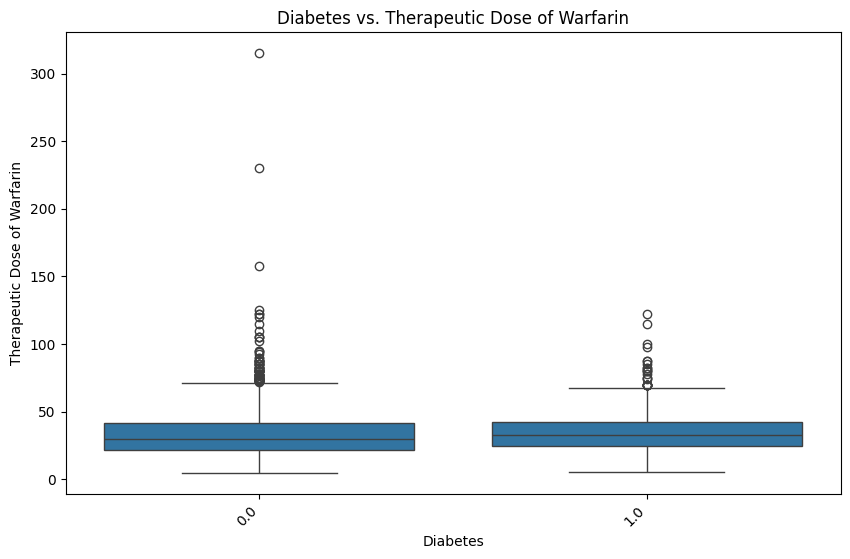

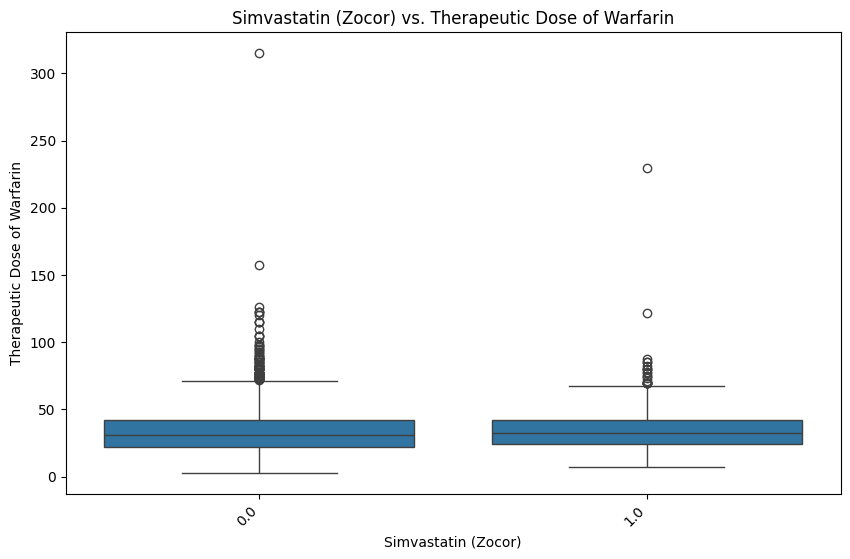

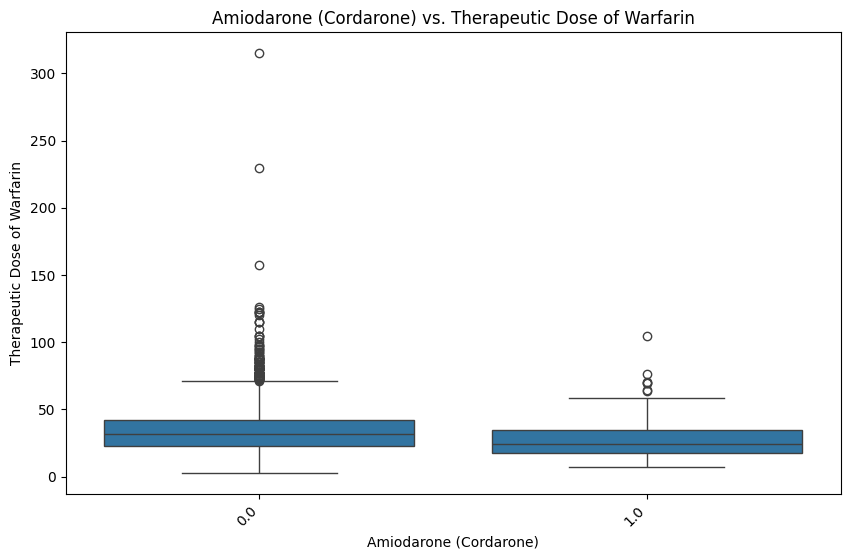

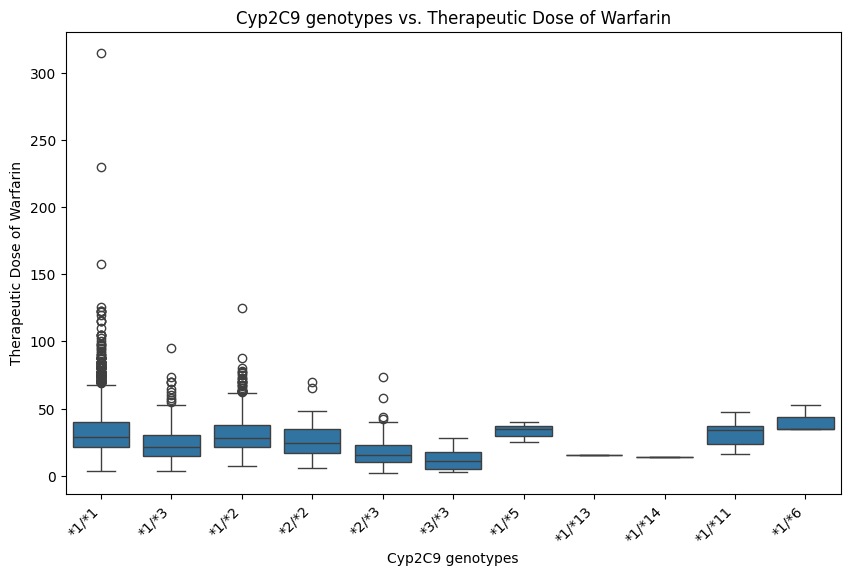

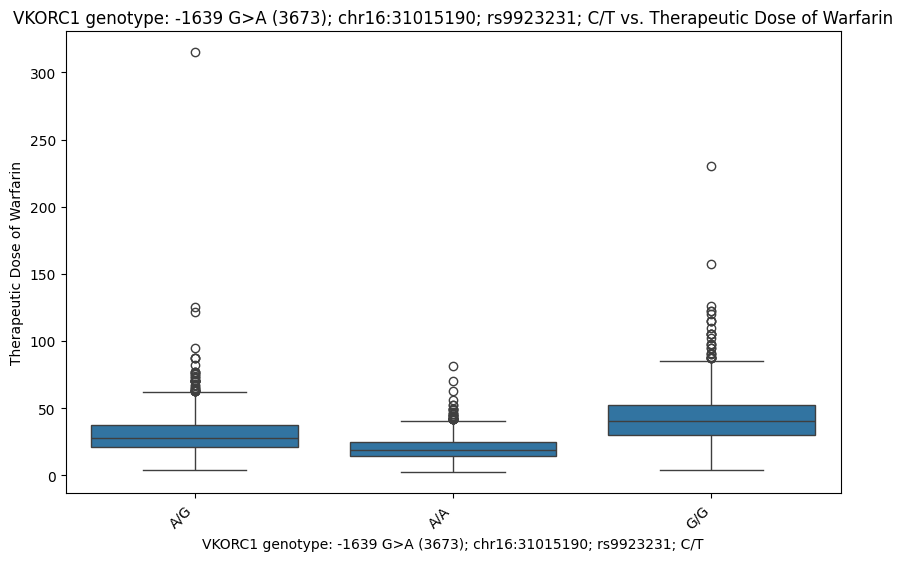

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Categorical features and the target variable
categorical_features = ['Gender', 'Race (Reported)', 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)', 'Cyp2C9 genotypes', 'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T']
target_variable = 'Therapeutic Dose of Warfarin'

# Create box plots for each categorical feature against the target variable
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=target_variable, data=df_selected)
    plt.title(f'{col} vs. {target_variable}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()


In [ ]:
black_race_terms = [
    'African-American', 'Black', 'Black or African American',
    'Black Caribbean', 'Other(Black British)', 'Black African', 'Black other', 'Other (Black British)'
]

Caucasian = ['White', 'Caucasian']
Asian = ['Japanese','Han Chinese', 'Korean', 'Malay','Chinese']
Other = ['Other', 'Intermediate']

df_selected.loc[:, 'Race (Reported)'] = df_selected['Race (Reported)'].replace(black_race_terms, 'Black')
df_selected.loc[:, 'Race (Reported)'] = df_selected['Race (Reported)'].replace(Caucasian, 'White')
df_selected.loc[:, 'Race (Reported)'] = df_selected['Race (Reported)'].replace(Asian, 'Asian')
df_selected.loc[:, 'Race (Reported)'] = df_selected['Race (Reported)'].replace(Other, 'Other')
race_counts = df_selected['Race (Reported)'].value_counts()

#Identify races with fewer than 50 instances
rare_races = race_counts[race_counts < 50].index
df_selected.loc[:, 'Race (Reported)'] = df_selected['Race (Reported)'].replace(rare_races, 'Other')


# Count the frequencies
genotype_counts = df_selected['Cyp2C9 genotypes'].value_counts()

# Identify rare genotypes
rare_genotypes = genotype_counts[genotype_counts < 50].index

# Replace them with 'Other'
df_selected.loc[:, 'Cyp2C9 genotypes'] = df_selected['Cyp2C9 genotypes'].replace(rare_genotypes, 'Other')

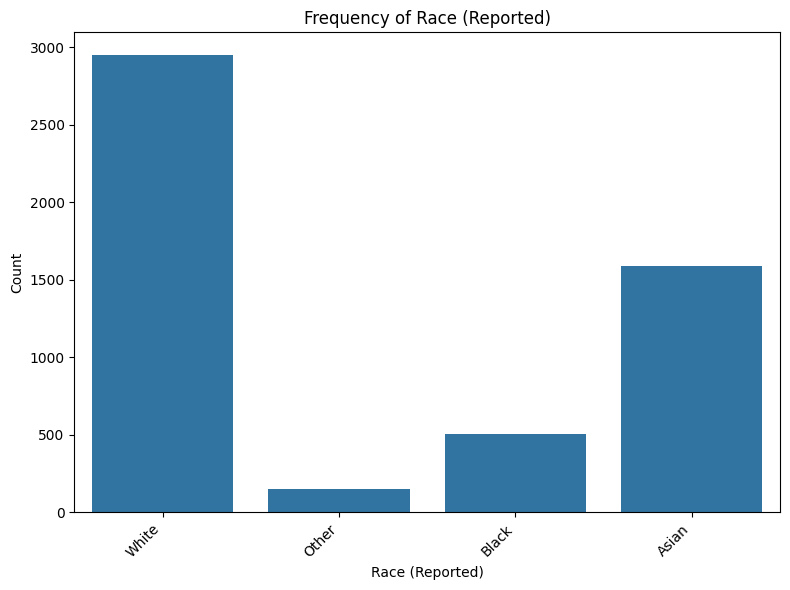

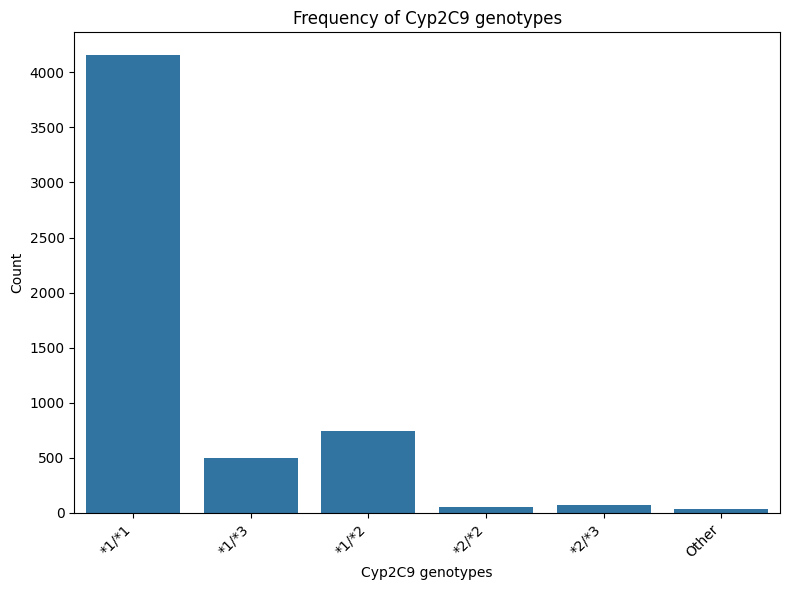

In [ ]:
import matplotlib.pyplot as plt
#Plot the frequency of Race (Reported)
plt.figure(figsize=(8, 6))
sns.countplot(x='Race (Reported)', data=df_selected)
plt.title('Frequency of Race (Reported)')
plt.xlabel('Race (Reported)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Plot the frequency of Cyp2C9 genotypes
plt.figure(figsize=(8, 6))
sns.countplot(x='Cyp2C9 genotypes', data=df_selected)
plt.title('Frequency of Cyp2C9 genotypes')
plt.xlabel('Cyp2C9 genotypes')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


df = df_selected.dropna(subset=['Therapeutic Dose of Warfarin']).copy()

miv_features = [
    'Race (Reported)',
    'Diabetes',
    'Simvastatin (Zocor)',
    'Amiodarone (Cordarone)',
    'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T',
    'Cyp2C9 genotypes'
]


for col in miv_features:
    df.loc[:, col + '_missing'] = df[col].isna().astype(int)

In [ ]:
df.shape

(5528, 19)

In [ ]:
df.dtypes

,0
Gender,object
Race (Reported),object
Age,object
Height (cm),float64
Weight (kg),float64
Diabetes,float64
Simvastatin (Zocor),float64
Amiodarone (Cordarone),float64
Target INR,float64
INR on Reported Therapeutic Dose of Warfarin,float64


In [ ]:
categorical_features = ['Gender', 'Race (Reported)', 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)', 'Cyp2C9 genotypes', 'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T']
for col in categorical_features:
    df[col] = df[col].astype(str)
df.dtypes

,0
Gender,object
Race (Reported),object
Age,object
Height (cm),float64
Weight (kg),float64
Diabetes,object
Simvastatin (Zocor),object
Amiodarone (Cordarone),object
Target INR,float64
INR on Reported Therapeutic Dose of Warfarin,float64


In [ ]:

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Define numerical features to be transformed
numerical_features = ['Height (cm)', 'Weight (kg)']

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Fit and transform the data
df_selected[numerical_features] = preprocessor.fit_transform(df_selected)

df_selected['BMI'] = df_selected['Weight (kg)'] / ((df_selected['Height (cm)'] / 100) ** 2)

from sklearn.base import BaseEstimator, TransformerMixin

class BMICalculator(BaseEstimator, TransformerMixin):
    def __init__(self, height_col='Height (cm)', weight_col='Weight (kg)'):
        self.height_col = height_col
        self.weight_col = weight_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        height_m = X[self.height_col] / 100
        bmi = X[self.weight_col] / (height_m ** 2)
        return bmi.to_frame(name='BMI')

# Step 2: Calculate BMI and add it as a new column
bmi_calculator = BMICalculator()
bmi_values = bmi_calculator.transform(df)
df['BMI'] = bmi_values['BMI']

# Now 'df' has the new 'BMI' column
print(df.head())


   Gender Race (Reported)      Age  Height (cm)  Weight (kg) Diabetes  \
0    male           White  60 - 69      193.040        115.7      nan   
1  female           White  50 - 59      176.530        144.2      nan   
2  female           White  40 - 49      162.560         77.1      nan   
3    male           White  60 - 69      182.245         90.7      nan   
4    male           White  50 - 59      167.640         72.6      nan   

  Simvastatin (Zocor) Amiodarone (Cordarone)  Target INR  \
0                 0.0                    0.0         2.5   
1                 0.0                    0.0         2.5   
2                 0.0                    0.0         2.5   
3                 0.0                    0.0         2.5   
4                 0.0                    0.0         2.5   

   INR on Reported Therapeutic Dose of Warfarin Cyp2C9 genotypes  \
0                                          2.60            *1/*1   
1                                          2.15            *1/*1

<ipython-input-159-1da058d72922>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[numerical_features] = preprocessor.fit_transform(df_selected)
<ipython-input-159-1da058d72922>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['BMI'] = df_selected['Weight (kg)'] / ((df_selected['Height (cm)'] / 100) ** 2)


In [ ]:
def convert_age_range_to_midpoint(age_str):
    try:
        if age_str.endswith('+'):
            return 95  # Or another reasonable value for "90+"
        low, high = map(int, age_str.split('-'))
        return (low + high) / 2
    except (ValueError, TypeError, AttributeError):
        return age_str

df.loc[:,'Age'] = df['Age'].apply(convert_age_range_to_midpoint).astype('float64')

In [ ]:
df.head(5)

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Therapeutic Dose of Warfarin,Race (Reported)_missing,Diabetes_missing,Simvastatin (Zocor)_missing,Amiodarone (Cordarone)_missing,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T_missing,Cyp2C9 genotypes_missing,BMI
0,male,White,64.5,193.040,115.7,nan,0.0,0.0,2.5,2.60,*1/*1,A/G,49.0,0,1,0,0,0,0,31.048365
1,female,White,54.5,176.530,144.2,nan,0.0,0.0,2.5,2.15,*1/*1,A/A,42.0,0,1,0,0,0,0,46.273060
2,female,White,44.5,162.560,77.1,nan,0.0,0.0,2.5,1.90,*1/*1,G/G,53.0,0,1,0,0,0,0,29.176084
3,male,White,64.5,182.245,90.7,nan,0.0,0.0,2.5,2.40,*1/*1,A/G,28.0,0,1,0,0,0,0,27.308387
4,male,White,54.5,167.640,72.6,nan,0.0,0.0,2.5,1.90,*1/*3,A/G,42.0,0,1,0,0,0,0,25.833385


In [ ]:
# Step 1: Define your feature groups
low_missing_num = ['Age']
low_missing_cat = ['Gender']
knn_group = ['Height (cm)', 'Weight (kg)', 'BMI']
domain_default = ['Target INR']
optional_lab = ['INR on Reported Therapeutic Dose of Warfarin']
high_missing_cat = [
    'Race (Reported)',
    'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)',
    'Cyp2C9 genotypes',
    'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'
]

miv_flags = [col + '_missing' for col in miv_features]

# Step 2: Define each imputation + transformation pipeline
low_num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

low_cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=1)),
    ('scaler', StandardScaler())
])

default_inr_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=2.5)),
    ('scaler', StandardScaler())
])

optional_lab_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

high_cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Step 3: ColumnTransformer that applies all of these
preprocessor = ColumnTransformer(transformers=[
    ('num_low', low_num_pipeline, low_missing_num),
    ('cat_low', low_cat_pipeline, low_missing_cat),
    ('knn_group', knn_pipeline, knn_group),
    ('default_inr', default_inr_pipeline, domain_default),
    ('optional_lab', optional_lab_pipeline, optional_lab),
    ('cat_unknowns', high_cat_pipeline, high_missing_cat),
    ('miv_flags', 'passthrough', miv_flags)
], remainder='drop')

In [ ]:
# Regression_Model
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Combine preprocessing and model into a full pipeline
RF_regression_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('pca', PCA(n_components=20)),  # reduce to 20 components
    ('model', RandomForestRegressor(random_state=42)) # Changed to RandomForestRegressor
])

# Define features and target
X = df.drop(columns=['Therapeutic Dose of Warfarin'])
y = df['Therapeutic Dose of Warfarin']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
RF_regression_pipeline.fit(X_train, y_train)
y_pred = RF_regression_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\Model Evaluation Metrics:")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.2f}")

from joblib import dump

# Save the regression model to a file
dump(RF_regression_pipeline, '/content/Models/regression_model.joblib')


\Model Evaluation Metrics:
MAE : 9.19
RMSE: 12.53
R²  : 0.36


['/content/Models/regression_model.joblib']

In [ ]:
X_test

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Race (Reported)_missing,Diabetes_missing,Simvastatin (Zocor)_missing,Amiodarone (Cordarone)_missing,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T_missing,Cyp2C9 genotypes_missing,BMI
3789,female,White,74.5,170.180,67.7,0.0,0.0,0.0,NaN,2.00,*1/*1,G/G,0,0,0,0,0,0,23.376077
1370,male,Asian,74.5,162.052,71.0,nan,nan,nan,NaN,2.01,*1/*1,A/A,0,1,1,1,0,0,27.036443
4932,male,Other,64.5,NaN,58.8,nan,nan,nan,NaN,2.60,*1/*1,nan,0,1,1,1,1,0,NaN
3588,male,White,64.5,179.000,85.0,1.0,0.0,0.0,NaN,2.52,*1/*2,A/G,0,0,0,0,0,0,26.528510
3445,female,Black,84.5,167.640,72.3,1.0,0.0,0.0,2.5,2.60,*1/*1,A/G,0,0,0,0,0,0,25.726635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,female,Asian,74.5,152.908,53.0,nan,nan,nan,NaN,1.37,*1/*1,A/A,0,1,1,1,0,0,22.668117
3739,female,White,44.5,NaN,NaN,nan,0.0,0.0,NaN,2.50,*1/*1,A/G,0,1,0,0,0,0,NaN
1319,female,Asian,74.5,146.050,47.5,nan,nan,nan,NaN,1.61,*1/*1,A/A,0,1,1,1,0,0,22.268476
2778,male,Asian,74.5,170.000,73.0,0.0,0.0,0.0,NaN,2.17,*1/*1,A/A,0,0,0,0,0,0,25.259516


In [ ]:
from sklearn.model_selection import train_test_split
df['Dose_Class'] = (df['Therapeutic Dose of Warfarin'] > 30).astype(int)

X = df.drop(columns=['Therapeutic Dose of Warfarin', 'Dose_Class'])  # drop regression target
y = df['Dose_Class']  # classification target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

Best Hyperparameters: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best Cross-Validation Score: 0.7476245622108035
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       625
           1       0.71      0.70      0.71       481

    accuracy                           0.75      1106
   macro avg       0.74      0.74      0.74      1106
weighted avg       0.75      0.75      0.75      1106

Accuracy: 0.7468354430379747
Confusion Matrix:
[[490 135]
 [145 336]]


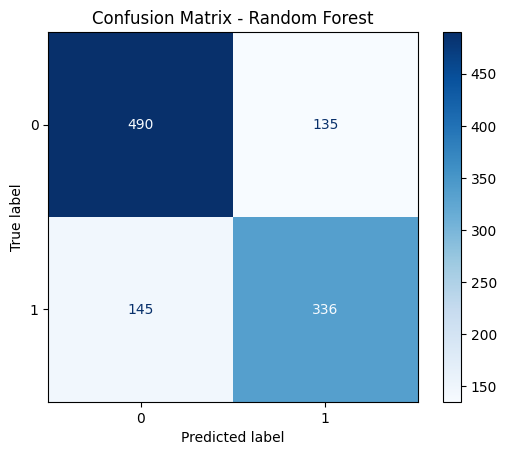

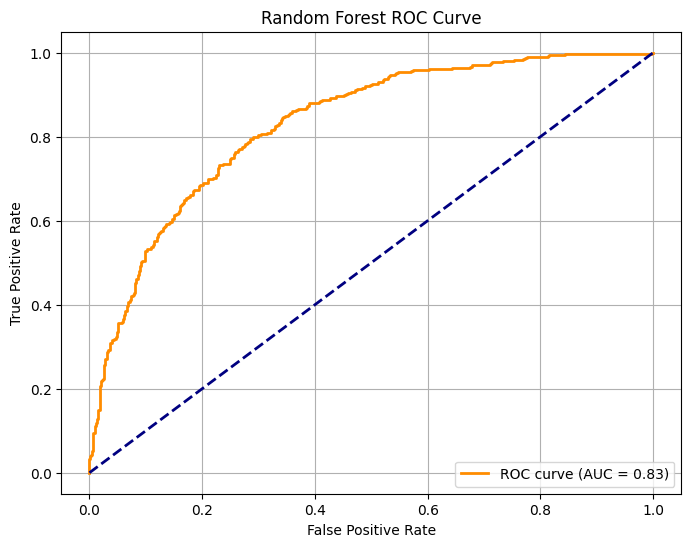

['/content/Models/RF_best_classifier.joblib']

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay
# Create a pipeline with the RandomForestClassifier
RF_classification_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('pca', PCA(n_components=20)),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid = {
    'model__n_estimators': [200],
    'model__max_depth': [10],
    'model__min_samples_split': [2],
    'model__min_samples_leaf': [4]
}
from sklearn.model_selection import GridSearchCV
# Create the GridSearchCV object
grid_search = GridSearchCV(RF_classification_pipeline, param_grid, cv=5, scoring='accuracy') # Use appropriate scoring metric

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", best_score)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
# Evaluate the best model on the test set
RF_best_classifier = grid_search.best_estimator_
y_pred = RF_best_classifier.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

# Confusion Matrix (Graphical)
ConfusionMatrixDisplay.from_estimator(RF_best_classifier, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# AUC-ROC Curve
y_pred_proba = RF_best_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

from joblib import dump

# Save the best model from grid search
dump(RF_best_classifier, '/content/Models/RF_best_classifier.joblib')


In [ ]:
pip install tensorflow scikit-learn

Logistic Regression Performance:
              precision    recall  f1-score   support

           0     0.7772    0.7760    0.7766       625
           1     0.7095    0.7110    0.7103       481

    accuracy                         0.7477      1106
   macro avg     0.7434    0.7435    0.7435      1106
weighted avg     0.7478    0.7477    0.7478      1106

Confusion Matrix:
 [[485 140]
 [139 342]]


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last

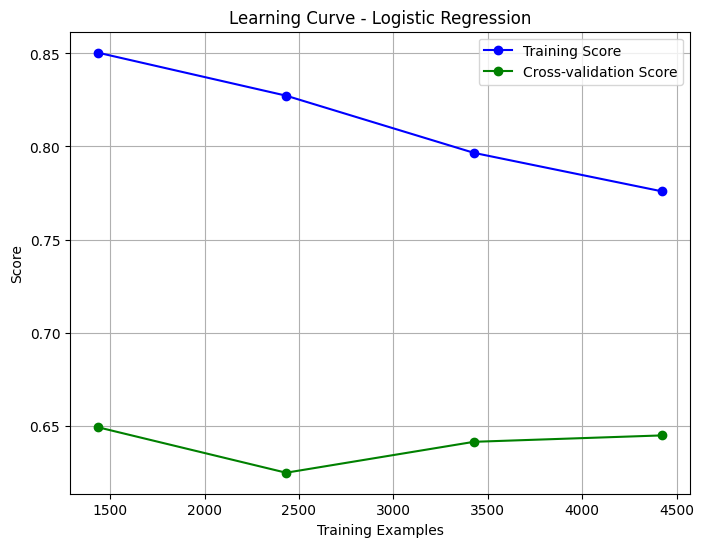

In [ ]:
##Logistic Regression

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

LRegression_classifier= Pipeline([
    ('preprocessing', preprocessor),  # only fit on X_train
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

LRegression_classifier.fit(X_train, y_train)
y_pred = LRegression_classifier.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

from joblib import dump

# Save the model
dump(LRegression_classifier, '/content/Models/LRegression_classifier.joblib')

from sklearn.model_selection import learning_curve

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    LRegression_classifier, X, y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation Score', color='green')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve - Logistic Regression')
plt.legend(loc='best')
plt.grid(True)
plt.show()

SVM Classification Report:
              precision    recall  f1-score   support

           0     0.8267    0.7024    0.7595       625
           1     0.6765    0.8087    0.7367       481

    accuracy                         0.7486      1106
   macro avg     0.7516    0.7556    0.7481      1106
weighted avg     0.7614    0.7486    0.7496      1106

Confusion Matrix:
 [[439 186]
 [ 92 389]]


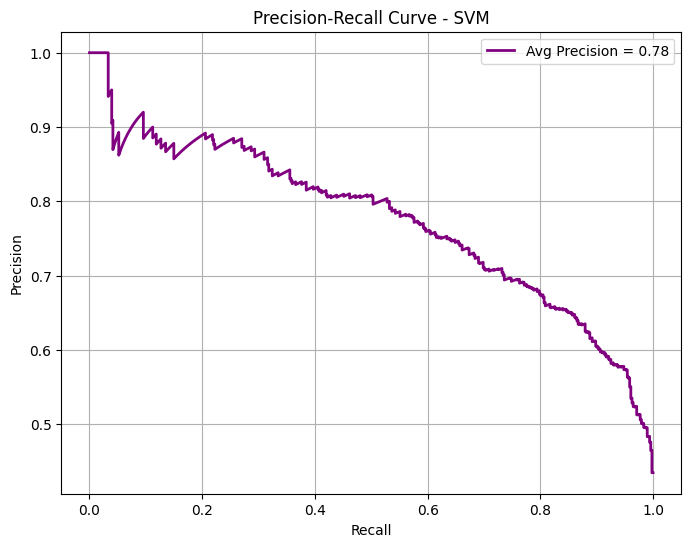

In [ ]:
from sklearn.svm import SVC

svm_classifier = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True))
])

svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

from joblib import dump

# Save the  model
dump(svm_classifier, '/content/Models/svm_classifier.joblib')


from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, precision_recall_curve, average_precision_score
)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

knn_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('pca', PCA(n_components=0.95)),         # Keep 95% of variance
    ('knn', KNeighborsClassifier(n_neighbors=5))  # Default K
])

knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


KNN Classification Report:
              precision    recall  f1-score   support

           0     0.7593    0.7168    0.7374       625
           1     0.6570    0.7048    0.6800       481

    accuracy                         0.7116      1106
   macro avg     0.7081    0.7108    0.7087      1106
weighted avg     0.7148    0.7116    0.7125      1106

Confusion Matrix:
 [[448 177]
 [142 339]]


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best KNN Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'distance'}
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       625
           1       0.69      0.71      0.70       481

    accuracy                           0.74      1106
   macro avg       0.73      0.73      0.73      1106
weighted avg       0.74      0.74      0.74      1106



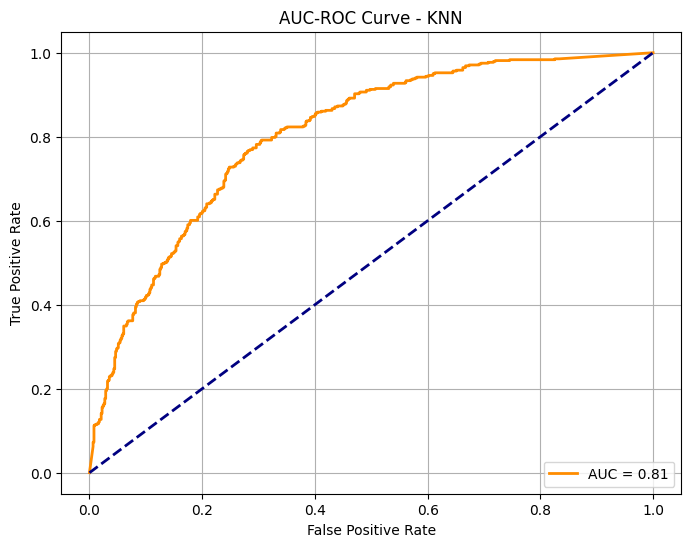

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'knn__n_neighbors': [11],
    'knn__weights': ['distance'],
    'knn__metric': ['manhattan']
}

grid_knn = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("Best KNN Parameters:", grid_knn.best_params_)

# Evaluate best model
best_knn = grid_knn.best_estimator_
y_pred = best_knn.predict(X_test)
print(classification_report(y_test, y_pred))

from joblib import dump

# Save the best  model from grid search
dump(best_knn, '/content/Models/best_knn.joblib')

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability scores (for class 1)
y_proba = grid_knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve - KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
lda_classifier = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('lda', LinearDiscriminantAnalysis())
])

lda_classifier.fit(X_train, y_train)
y_pred = lda_classifier.predict(X_test)

from joblib import dump

# Save the best  model from grid search
dump(lda_classifier, '/content/Models/lda_classifier.joblib')

from sklearn.metrics import classification_report, confusion_matrix

print("LDA Classification Report:")
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

LDA Classification Report:
              precision    recall  f1-score   support

           0     0.7853    0.7840    0.7846       625
           1     0.7199    0.7214    0.7207       481

    accuracy                         0.7568      1106
   macro avg     0.7526    0.7527    0.7526      1106
weighted avg     0.7568    0.7568    0.7568      1106

Confusion Matrix:
 [[490 135]
 [134 347]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#  Train/test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Preprocessing (fit on training data only)
X_train_processed = preprocessor.fit_transform(X_train_raw)
X_test_processed = preprocessor.transform(X_test_raw)

# Define input shape
input_dim = X_train_processed.shape[1]

# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(
    X_train_processed, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Predict on processed test data
y_pred_prob = model.predict(X_test_processed)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.6371 - loss: 0.6271 - val_accuracy: 0.7299 - val_loss: 0.5393
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7492 - loss: 0.5219 - val_accuracy: 0.7582 - val_loss: 0.4977
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7426 - loss: 0.5113 - val_accuracy: 0.7718 - val_loss: 0.4887
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7384 - loss: 0.5086 - val_accuracy: 0.7582 - val_loss: 0.4901
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7745 - loss: 0.4859 - val_accuracy: 0.7718 - val_loss: 0.4814
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7597 - loss: 0.5108 - val_accuracy: 0.7627 - val_loss: 0.4920
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7617 - loss: 0.4929 - val_accuracy: 0.7571 - val_loss: 0.4874
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7743 - loss: 0.4702 - val_accurac

In [ ]:
#Train with Auto-encoder

encoding_dim = 32

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded_output = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded_output)
decoded = Dense(128, activation='relu')(decoded)
decoded_output = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded_output)
autoencoder.compile(optimizer=Adam(0.001), loss='mse')

autoencoder.fit(X_train_processed, X_train_processed,
                epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Use encoder to compress features
encoder = Model(inputs=input_layer, outputs=encoded_output)

X_train_encoded = encoder.predict(X_train_processed)
X_test_encoded = encoder.predict(X_test_processed)

# Train classifier on encoded training data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_encoded, y_train)

y_pred = clf.predict(X_test_encoded)

print("Classification Report (Autoencoder + RF):")
print(classification_report(y_test, y_pred))

Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3089 - val_loss: 0.1593
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1561 - val_loss: 0.1178
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1294 - val_loss: 0.1055
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1158 - val_loss: 0.0995
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1142 - val_loss: 0.0963
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1059 - val_loss: 0.0945
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1060 - val_loss: 0.0932
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1073 - val_loss: 0.0921
Epoch 9/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1012 - val_loss: 0.0912
Epoch 10/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1054 - val_loss: 0.0903
Epoch 11/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0961 - val_loss: 0.0884
Epoch 12/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Voting Classifier Performance:
              precision    recall  f1-score   support

           0     0.7883    0.7744    0.7813       625
           1     0.7134    0.7297    0.7215       481

    accuracy                         0.7550      1106
   macro avg     0.7508    0.7521    0.7514      1106
weighted avg     0.7557    0.7550    0.7553      1106

Confusion Matrix:
 [[484 141]
 [130 351]]


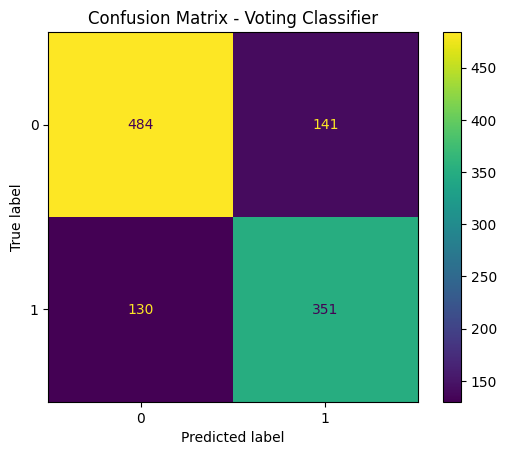

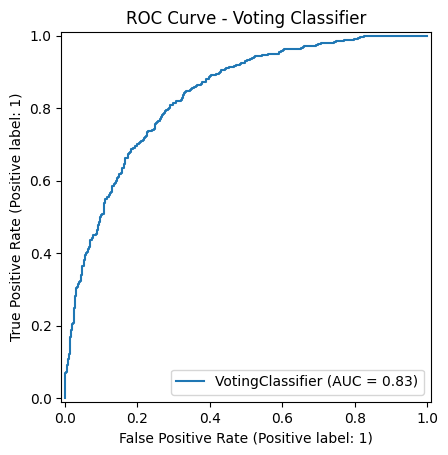

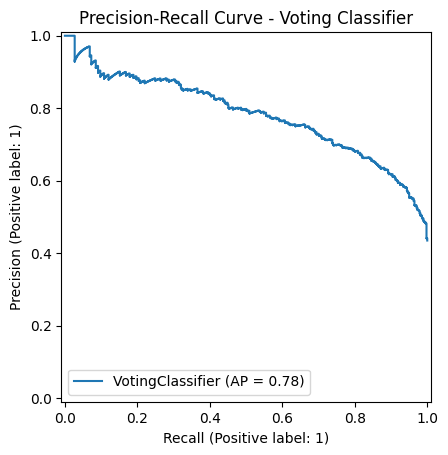

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
df['Dose_Class'] = (df['Therapeutic Dose of Warfarin'] > 30).astype(int)

X = df.drop(columns=['Therapeutic Dose of Warfarin', 'Dose_Class'])  # drop regression target
y = df['Dose_Class']  # classification target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize voting_clf with VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('rf', RF_best_classifier),
    ('lr', LRegression_classifier),
    ('svm', svm_classifier),
    ('knn', grid_knn.best_estimator_),
    ('lda', lda_classifier)
], voting='soft')

# Fit the ensemble
voting_clf.fit(X_train, y_train)

# Predict
y_pred_vote = voting_clf.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("Voting Classifier Performance:")
print(classification_report(y_test, y_pred_vote, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_vote))


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

disp = ConfusionMatrixDisplay.from_estimator(voting_clf, X_test, y_test)
disp.ax_.set_title("Confusion Matrix - Voting Classifier")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(voting_clf, X_test, y_test)
plt.title("ROC Curve - Voting Classifier")
plt.show()


# Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(voting_clf, X_test, y_test)
plt.title("Precision-Recall Curve - Voting Classifier")
plt.show()

In [ ]:
# download the models for hugging face space deployment

from google.colab import files
import shutil

shutil.make_archive('Models', 'zip', '/content/Models')  # Create a zip archive
files.download('Models.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>